### **1. Import Libraries**

Import the required libraries for data manipulation, visualization, preprocessing, and model building.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier

### **2. Download and Load the Dataset**

Download the `train.xl` and `test.xl` from the [zenodo](https://zenodo.org/records/45735) dataset. Load the training and test datasets into pandas DataFrames. Display the first few rows of the training dataset and print the list of columns present in the dataset.

**Note:** Make sure the path is correct while loading the dataset

In [146]:
trainData = pd.read_excel('train.xlsx')
testData = pd.read_excel('test.xlsx')
print("First few rows of the training dataset:")
print(trainData.head())
print("\nColumns in the training dataset:")
print(trainData.info())
print("First few rows of the test dataset:")
print(testData.head())
print("\nColumns in the test dataset:")
print(testData.info())

First few rows of the training dataset:
  Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19    84.3000000  ...   
1         assistant manager     Indore      m 1989-10-04    85.4000000  ...   
2          systems engineer    Chennai      f 1992-08-03    85.0000000  ...   
3  senior software engineer    Gurgaon      m 1989-12-05    85.6000000  ...   
4                       get    Manesar      m 1991-02-27    78.0000000  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1 

### **3. Data Cleaning**

#### **3.1 Drop Unnecessary Columns**

- Drop the `Unnamed: 0` column from the both training and test datasets.
- Drop the `DOJ`, `DOL`, `Designation`, and `JobCity` columns from the training dataset as these columns are not present in the test dataset.
- Drop the `Salary` column from the test dataset as it contains no real values, only `?`.

In [147]:

trainData = trainData.drop(columns=['Unnamed: 0'], errors='ignore')
testData = testData.drop(columns=['Unnamed: 0'], errors='ignore')

columns_to_drop_train = ['DOJ', 'DOL', 'Designation', 'JobCity']
trainData = trainData.drop(columns=columns_to_drop_train, errors='ignore')
testData = testData.drop(columns=['Salary','DOJ', 'DOL', 'Designation', 'JobCity'])

print("Training dataset after dropping columns:")
print(trainData.head())

print("\nTest dataset after dropping columns:")
print(testData.head())

Training dataset after dropping columns:
       ID   Salary Gender        DOB  10percentage  \
0  203097   420000      f 1990-02-19    84.3000000   
1  579905   500000      m 1989-10-04    85.4000000   
2  810601   325000      f 1992-08-03    85.0000000   
3  267447  1100000      m 1989-12-05    85.6000000   
4  343523   200000      m 1991-02-27    78.0000000   

                          10board  12graduation  12percentage  \
0  board ofsecondary education,ap          2007    95.8000000   
1                            cbse          2007    85.0000000   
2                            cbse          2010    68.2000000   
3                            cbse          2007    83.6000000   
4                            cbse          2008    76.8000000   

                              12board  CollegeID  ...  ComputerScience  \
0  board of intermediate education,ap       1141  ...               -1   
1                                cbse       5807  ...               -1   
2                    

#### **3.2 Remove Non-Predictive Columns**

Drop columns that are unlikely to influence the target variable (i.e., 'Salary'). Columns like `10board`, `12board`, `CollegeID`, `CollegeTier`, `CollegeCityID`, `CollegeCityTier`, and `CollegeState` are less likely to influence the salary of a candidate.

**Note:** You can always try to include these columns and see if it improves the model performance.

In [148]:
columns_to_drop = ['10board', '12board', 'CollegeID', 'CollegeTier', 'CollegeCityID', 'CollegeCityTier', 'CollegeState']


trainData = trainData.drop(columns=columns_to_drop, errors='ignore')
testData = testData.drop(columns=columns_to_drop, errors='ignore')


print("Training dataset after dropping columns:")
print(trainData.head())
print("\nColumns in the training dataset:")
print(trainData.info())

print("\nTest dataset after dropping columns:")
print(testData.head())
print("\nColumns in the test dataset:")
print(testData.info())

Training dataset after dropping columns:
       ID   Salary Gender        DOB  10percentage  12graduation  \
0  203097   420000      f 1990-02-19    84.3000000          2007   
1  579905   500000      m 1989-10-04    85.4000000          2007   
2  810601   325000      f 1992-08-03    85.0000000          2010   
3  267447  1100000      m 1989-12-05    85.6000000          2007   
4  343523   200000      m 1991-02-27    78.0000000          2008   

   12percentage       Degree                             Specialization  \
0    95.8000000  B.Tech/B.E.                       computer engineering   
1    85.0000000  B.Tech/B.E.  electronics and communication engineering   
2    68.2000000  B.Tech/B.E.                     information technology   
3    83.6000000  B.Tech/B.E.                       computer engineering   
4    76.8000000  B.Tech/B.E.  electronics and communication engineering   

   collegeGPA  ...  ComputerScience  MechanicalEngg  ElectricalEngg  \
0  78.0000000  ...          

#### **3.3 Set Index**

Optionally set the `ID` column as the index for the training and test datasets as it is unique for each row. Use the `set_index` method to do this.


In [149]:

if 'ID' in trainData.columns:
    trainData = trainData.set_index('ID')

if 'ID' in testData.columns:
    testData = testData.set_index('ID')


print("Training dataset after setting 'ID' as the index:")
print(trainData.head())

print("\nTest dataset after setting 'ID' as the index:")
print(testData.head())


Training dataset after setting 'ID' as the index:
         Salary Gender        DOB  10percentage  12graduation  12percentage  \
ID                                                                            
203097   420000      f 1990-02-19    84.3000000          2007    95.8000000   
579905   500000      m 1989-10-04    85.4000000          2007    85.0000000   
810601   325000      f 1992-08-03    85.0000000          2010    68.2000000   
267447  1100000      m 1989-12-05    85.6000000          2007    83.6000000   
343523   200000      m 1991-02-27    78.0000000          2008    76.8000000   

             Degree                             Specialization  collegeGPA  \
ID                                                                           
203097  B.Tech/B.E.                       computer engineering  78.0000000   
579905  B.Tech/B.E.  electronics and communication engineering  70.0600000   
810601  B.Tech/B.E.                     information technology  70.0000000   
267447

#### **3.4 Check for Missing Values**

- Check if there are any `Null` values in the dataset using the `info` method.
- Identify invalid values such as `-1` and `0` in the dataset using boolean indexing (i.e., `trainData[trainData == -1].count()` and `trainData[trainData == 0].count()`).

In [150]:

print("Null values in the training dataset:")
print(trainData.isnull().sum())


print("\nNull values in the test dataset:")
print(testData.isnull().sum())


print("\nCount of -1 values in the training dataset:")
print((trainData == -1).sum())

print("\nCount of 0 values in the training dataset:")
print((trainData == 0).sum())


print("\nCount of -1 values in the test dataset:")
print((testData == -1).sum())

print("\nCount of 0 values in the test dataset:")
print((testData == 0).sum())


Null values in the training dataset:
Salary                   0
Gender                   0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

Null values in the test dataset:
Gender                   0
DOB                      0
10percentage             0
12graduation             0
12percentage             0
Degree                   0
Specialization           0
collegeGPA               

#### **3.4 Handle Missing Values**

From the `info` method, we can see that there are no missing values (i.e., `Null` value) in the dataset. But there are some invalid values such as `0` and `-1` in the dataset.

- `GraduationYear` column contains `0` which is an invalid value. Replace the `0` values with the mode of the column, use `SimpleImputer` class from the `sklearn.impute` module.
- The following columns contain `-1` which is an invalid value:
    - `Domain`
    - `ComputerProgramming`
    - `ElectronicsAndSemicon`
    - `ComputerScience`
    - `MechanicalEngg`
    - `ElectricalEngg`
    - `TelecomEngg`
    - `CivilEngg`
    
    From the dataset description, we know that `Domain` column was calculated using the `ComputerProgramming`, `ElectronicsAndSemicon`, `ComputerScience`, `MechanicalEngg`, `ElectricalEngg`, `TelecomEngg`, and `CivilEngg` columns. So, we can drop all these columns and keep only the `Domain` column.
- But the `Domain` column also contains `-1` values. Now replace the `-1` values in the `Domain` column using one of the following methods:
    - Drop the rows containing `-1` values in the `Domain` column.
    - Replace the `-1` values in the `Domain` column with the mean, median, or mode of the column using the `SimpleImputer` class from the `sklearn.impute` module.
    - Use any other method to replace the `-1` values in the `Domain` column (e.g., Using KNNImputer, IterativeImputer, etc.).

In [151]:

imputer_mode = SimpleImputer(missing_values=0, strategy='most_frequent')
if 'GraduationYear' in trainData.columns:
    trainData['GraduationYear'] = imputer_mode.fit_transform(trainData[['GraduationYear']])
if 'GraduationYear' in testData.columns:
    testData['GraduationYear'] = imputer_mode.transform(testData[['GraduationYear']])


columns_to_drop = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                   'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
trainData = trainData.drop(columns=columns_to_drop, errors='ignore')
testData = testData.drop(columns=columns_to_drop, errors='ignore')

imputer_median = SimpleImputer(missing_values=-1, strategy='median')
if 'Domain' in trainData.columns:
    trainData['Domain'] = imputer_median.fit_transform(trainData[['Domain']])
if 'Domain' in testData.columns:
    testData['Domain'] = imputer_median.transform(testData[['Domain']])


print("Training dataset after processing:")
print(trainData.head())
print("\nTest dataset after processing:")
print(testData.head())

print("\nCount of 0 and -1 values in the processed training dataset:")
print((trainData == 0).sum(), (trainData == -1).sum())

print("\nCount of 0 and -1 values in the processed test dataset:")
print((testData == 0).sum(), (testData == -1).sum())


Training dataset after processing:
         Salary Gender        DOB  10percentage  12graduation  12percentage  \
ID                                                                            
203097   420000      f 1990-02-19    84.3000000          2007    95.8000000   
579905   500000      m 1989-10-04    85.4000000          2007    85.0000000   
810601   325000      f 1992-08-03    85.0000000          2010    68.2000000   
267447  1100000      m 1989-12-05    85.6000000          2007    83.6000000   
343523   200000      m 1991-02-27    78.0000000          2008    76.8000000   

             Degree                             Specialization  collegeGPA  \
ID                                                                           
203097  B.Tech/B.E.                       computer engineering  78.0000000   
579905  B.Tech/B.E.  electronics and communication engineering  70.0600000   
810601  B.Tech/B.E.                     information technology  70.0000000   
267447  B.Tech/B.E.  

#### **3.5 Derive New Features**

- The `DOB` column is given in the timestamp format. Create a new column `BirthYear` by extracting the year from the `DOB` column using the `dt` accessor. Remove the `DOB` column from the dataset.
- Now, `BirthYear` column is not a good predictor for the salary. But we can use the `BirthYear`, `12graduation`, and `GraduationYear` columns to calculate the age of the candidate when he/she graduated from High School and College. That might be a good predictor for the salary as from the two age we may determine if the candidate is a prodigy or not, dropout or not, etc.
    - Calculate the `12GradAge` by subtracting the `12graduation` from the `BirthYear`.
    - Calculate the `GradAge` by subtracting the `GraduationYear` from the `BirthYear`.
    - Drop the `12graduation`, and `GraduationYear` columns from the training and test datasets.

In [152]:

if 'DOB' in trainData.columns:
    trainData['BirthYear'] = pd.to_datetime(trainData['DOB']).dt.year.astype('float64')
    trainData = trainData.drop(columns=['DOB'], errors='ignore')
if 'DOB' in testData.columns:
    testData['BirthYear'] = pd.to_datetime(testData['DOB']).dt.year.astype('float64')
    testData = testData.drop(columns=['DOB'], errors='ignore')

if 'BirthYear' in trainData.columns and '12graduation' in trainData.columns:
    trainData['12GradAge'] = (trainData['12graduation'] - trainData['BirthYear']).astype('float64')
if 'BirthYear' in testData.columns and '12graduation' in testData.columns:
    testData['12GradAge'] = (testData['12graduation'] - testData['BirthYear']).astype('float64')

if 'BirthYear' in trainData.columns and 'GraduationYear' in trainData.columns:
    trainData['GradAge'] = (trainData['GraduationYear'] - trainData['BirthYear']).astype('float64')
if 'BirthYear' in testData.columns and 'GraduationYear' in testData.columns:
    testData['GradAge'] = (testData['GraduationYear'] - testData['BirthYear']).astype('float64')


columns_to_drop = ['12graduation', 'GraduationYear']
trainData = trainData.drop(columns=columns_to_drop, errors='ignore')
testData = testData.drop(columns=columns_to_drop, errors='ignore')


print("Training dataset after deriving new features:")
print(trainData.head())

print("\nTest dataset after deriving new features:")
print(testData.head())


Training dataset after deriving new features:
         Salary Gender  10percentage  12percentage       Degree  \
ID                                                                
203097   420000      f    84.3000000    95.8000000  B.Tech/B.E.   
579905   500000      m    85.4000000    85.0000000  B.Tech/B.E.   
810601   325000      f    85.0000000    68.2000000  B.Tech/B.E.   
267447  1100000      m    85.6000000    83.6000000  B.Tech/B.E.   
343523   200000      m    78.0000000    76.8000000  B.Tech/B.E.   

                                   Specialization  collegeGPA  English  \
ID                                                                       
203097                       computer engineering  78.0000000      515   
579905  electronics and communication engineering  70.0600000      695   
810601                     information technology  70.0000000      615   
267447                       computer engineering  74.6400000      635   
343523  electronics and communication en

#### **3.6 Simplify Categorical Data**

Map `Specialization` column to following categories:

- 'CS' for Computer Science
- 'EC' for Electronics
- 'ME' for Mechanical
- 'EL' for Electrical
- 'CE' for Civil
- 'other' for other specializations

Use the dictionary given below to map the specializations to the categories using the `map` method.

```python
specialization_map = {
    "electronics and communication engineering": "EC",
    "computer science & engineering": "CS",
    "information technology": "CS",
    "computer engineering": "CS",
    "computer application": "CS",
    "mechanical engineering": "ME",
    "electronics and electrical engineering": "EC",
    "electronics & telecommunications": "EC",
    "electrical engineering": "EL",
    "electronics & instrumentation eng": "EC",
    "civil engineering": "CE",
    "electronics and instrumentation engineering": "EC",
    "information science engineering": "CS",
    "instrumentation and control engineering": "EC",
    "electronics engineering": "EC",
    "biotechnology": "other",
    "other": "other",
    "industrial & production engineering": "other",
    "chemical engineering": "other",
    "applied electronics and instrumentation": "EC",
    "computer science and technology": "CS",
    "telecommunication engineering": "EC",
    "mechanical and automation": "ME",
    "automobile/automotive engineering": "ME",
    "instrumentation engineering": "EC",
    "mechatronics": "ME",
    "electronics and computer engineering": "CS",
    "aeronautical engineering": "ME",
    "computer science": "CS",
    "metallurgical engineering": "other",
    "biomedical engineering": "other",
    "industrial engineering": "other",
    "information & communication technology": "EC",
    "electrical and power engineering": "EL",
    "industrial & management engineering": "other",
    "computer networking": "CS",
    "embedded systems technology": "EC",
    "power systems and automation": "EL",
    "computer and communication engineering": "CS",
    "information science": "CS",
    "internal combustion engine": "ME",
    "ceramic engineering": "other",
    "mechanical & production engineering": "ME",
    "control and instrumentation engineering": "EC",
    "polymer technology": "other",
    "electronics": "EC",
}
```

In [153]:
specialization_map = {
    "electronics and communication engineering": "EC",
    "computer science & engineering": "CS",
    "information technology": "CS",
    "computer engineering": "CS",
    "computer application": "CS",
    "mechanical engineering": "ME",
    "electronics and electrical engineering": "EC",
    "electronics & telecommunications": "EC",
    "electrical engineering": "EL",
    "electronics & instrumentation eng": "EC",
    "civil engineering": "CE",
    "electronics and instrumentation engineering": "EC",
    "information science engineering": "CS",
    "instrumentation and control engineering": "EC",
    "electronics engineering": "EC",
    "biotechnology": "other",
    "other": "other",
    "industrial & production engineering": "other",
    "chemical engineering": "other",
    "applied electronics and instrumentation": "EC",
    "computer science and technology": "CS",
    "telecommunication engineering": "EC",
    "mechanical and automation": "ME",
    "automobile/automotive engineering": "ME",
    "instrumentation engineering": "EC",
    "mechatronics": "ME",
    "electronics and computer engineering": "CS",
    "aeronautical engineering": "ME",
    "computer science": "CS",
    "metallurgical engineering": "other",
    "biomedical engineering": "other",
    "industrial engineering": "other",
    "information & communication technology": "EC",
    "electrical and power engineering": "EL",
    "industrial & management engineering": "other",
    "computer networking": "CS",
    "embedded systems technology": "EC",
    "power systems and automation": "EL",
    "computer and communication engineering": "CS",
    "information science": "CS",
    "internal combustion engine": "ME",
    "ceramic engineering": "other",
    "mechanical & production engineering": "ME",
    "control and instrumentation engineering": "EC",
    "polymer technology": "other",
    "electronics": "EC",
}

if 'Specialization' in trainData.columns:
    trainData['Specialization'] = trainData['Specialization'].str.lower().map(specialization_map).fillna('other')

if 'Specialization' in testData.columns:
    testData['Specialization'] = testData['Specialization'].str.lower().map(specialization_map).fillna('other')

print("Training dataset 'Specialization' column after mapping:")
print(trainData['Specialization'].value_counts())

print("\nTest dataset 'Specialization' column after mapping:")
print(testData['Specialization'].value_counts())


Training dataset 'Specialization' column after mapping:
Specialization
CS       2289
EC       1319
ME        220
EL         85
other      56
CE         29
Name: count, dtype: int64

Test dataset 'Specialization' column after mapping:
Specialization
CS       845
EC       507
ME        77
other     29
EL        27
CE        15
Name: count, dtype: int64


#### **3.7 Standardize the GPA Scale**

From the data description, we can see that some of the students have GPA on a scale of 10 and some on a scale of 100. We will convert the GPA that are less than 10 to a scale of 100 by multiplying them by 10. Use the binary indexing to update the `collegeGPA` column.

In [154]:

if 'collegeGPA' in trainData.columns:

    trainData.loc[trainData['collegeGPA'] < 10, 'collegeGPA'] *= 10
    print("Updated 'collegeGPA' column in the training dataset:")
    print(trainData['collegeGPA'].describe())

if 'collegeGPA' in testData.columns:

    testData.loc[testData['collegeGPA'] < 10, 'collegeGPA'] *= 10
    print("\nUpdated 'collegeGPA' column in the test dataset:")
    print(testData['collegeGPA'].describe())


Updated 'collegeGPA' column in the training dataset:
count   3998.0000000
mean      71.6957279
std        7.4066309
min       49.0700000
25%       66.5050000
50%       71.8000000
75%       76.4000000
max       99.9300000
Name: collegeGPA, dtype: float64

Updated 'collegeGPA' column in the test dataset:
count   1500.0000000
mean      72.0373067
std        7.2369326
min       43.9000000
25%       67.3200000
50%       72.0000000
75%       76.8000000
max       95.0000000
Name: collegeGPA, dtype: float64


#### **3.8 Remove Outliers**

- Draw the boxplot of the `Salary` column to check for outliers. Here, we are doing it only for the `Salary` column. You can do it for other numerical columns as well.

- From the boxplot, you will see that the data points where `Salary` > 10,00,000 are rare, especially in the first job. Remove the data points where `Salary` > 10,00,000 from the training dataset.

count      3962.0000000
mean     294311.9636547
std      141549.7414835
min       35000.0000000
25%      180000.0000000
50%      300000.0000000
75%      365000.0000000
max     1000000.0000000
Name: Salary, dtype: float64


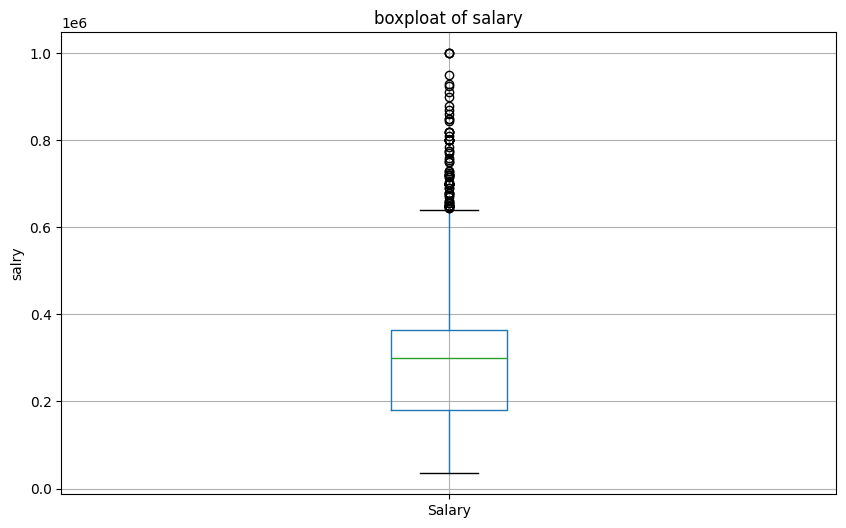

In [155]:


trainData = trainData[trainData['Salary'] <= 1_000_000]


pd.set_option('display.float_format', lambda x: '%.7f' % x)
print(trainData['Salary'].describe())

plt.figure(figsize=(10, 6))
trainData.boxplot(column =['Salary'])
plt.title('boxploat of salary')
plt.ylabel('salry')
plt.show()




### **4. Data Preprocessing**

#### **4.1 Encoding Categorical Columns**

- Convert the `Gender` column to numerical values using the `LabelEncoder` class from the `sklearn.preprocessing` module. It will convert each category in the column to a unique integer. Useful when the number of categories is less.

- Convert the `Degree` and `Specialization` columns to numerical values using the `get_dummies` method from the pandas library. It will create one-hot encoded columns for each category in the column. Useful when the number of categories is more, which is the case here.

In [156]:

# Encoding
label_encoder = LabelEncoder()
trainData['Gender'] = label_encoder.fit_transform(trainData['Gender'])
testData['Gender'] = label_encoder.transform(testData['Gender'])

# One-hot encoding
trainData = pd.get_dummies(trainData, columns=['Degree', 'Specialization'], dtype=int)
testData = pd.get_dummies(testData, columns=['Degree', 'Specialization'], dtype=int)

print(trainData.head())
print(testData.head())


         Salary  Gender  10percentage  12percentage  collegeGPA  English  \
ID                                                                         
203097   420000       0    84.3000000    95.8000000  78.0000000      515   
579905   500000       1    85.4000000    85.0000000  70.0600000      695   
810601   325000       0    85.0000000    68.2000000  70.0000000      615   
343523   200000       1    78.0000000    76.8000000  73.9000000      545   
1027655  300000       1    89.9200000    87.0000000  76.3200000      560   

         Logical  Quant    Domain  conscientiousness  ...  Degree_B.Tech/B.E.  \
ID                                                    ...                       
203097       585    525 0.6359788          0.9737000  ...                   1   
579905       610    780 0.9606033         -0.7335000  ...                   1   
810601       545    370 0.4508766          0.2718000  ...                   1   
343523       625    465 0.1245021         -0.8810000  ...     

#### **4.2 Scale Numerical Columns**

Scale the numerical columns using the `StandardScaler` class from the `sklearn.preprocessing` module. It will scale the numerical columns to have a mean of 0 and a standard deviation of 1. Don't scale the target variable `Salary`.



In [157]:

X = trainData.drop('Salary', axis=1)
y = trainData['Salary']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

testData_scaled = scaler.transform(testData)
testData = pd.DataFrame(testData_scaled, columns=testData.columns)

trainData = pd.concat([y.reset_index(drop=True), X_scaled], axis=1)

print("Scaled Training Data:")
print(trainData.head())
print("\nScaled Test Data:")
print(testData.head())


Scaled Training Data:
   Salary     Gender  10percentage  12percentage  collegeGPA   English  \
0  420000 -1.7805972     0.6479539     1.9386659   0.8555400 0.1287733   
1  500000  0.5616093     0.7597820     0.9570119  -0.2197163 1.8465851   
2  325000 -1.7805972     0.7191172    -0.5700054  -0.2278417 1.0831132   
3  200000  0.5616093     0.0074840     0.2116820   0.3003069 0.4150752   
4  300000  0.5616093     1.2192937     1.1387997   0.6280298 0.5582262   

    Logical      Quant     Domain  conscientiousness  ...  Degree_B.Tech/B.E.  \
0 0.9652186  0.0963071  0.0921255          0.9829681  ...           0.2825921   
1 1.2540307  2.1886007  1.3175802         -0.6791061  ...           0.2825921   
2 0.5031192 -1.1754792 -0.6066336          0.2996212  ...           0.2825921   
3 1.4273180 -0.3959973 -1.8386946         -0.8227073  ...           0.2825921   
4 0.6186440  0.8757890  0.1427518         -0.2596933  ...           0.2825921   

   Degree_M.Sc. (Tech.)  Degree_M.Tech./M.E.  

### **5. Feature Selection**

Select the features that are important for the model. You can use following methods to select the features:

- **Correlation Matrix:** Find the correlation between the features and the target variable and select the features that have a high correlation with the target variable.
- You can create new features by combining the existing features that can help improve the model's performance. For example:
    - Mutiply two features to create a new feature.
    - Take the square, cube, or square root of a feature to create a new feature.
    - You also can consider log transformation of the features.
    - You can also use the `PolynomialFeatures` class from the `sklearn.preprocessing` module to create new features.
- **Sci-Kit Learn:** Use `SelectKBest`, `SelectPercentile`, `RFE`, `RFECV`, etc. to select the features. You can use any of these methods to select the features. See the documentation of the 'sklearn.feature_selection' module for more information.

**Note:** Bonus credits will be given if you can report which features are the best predictors of the First job annual salary.

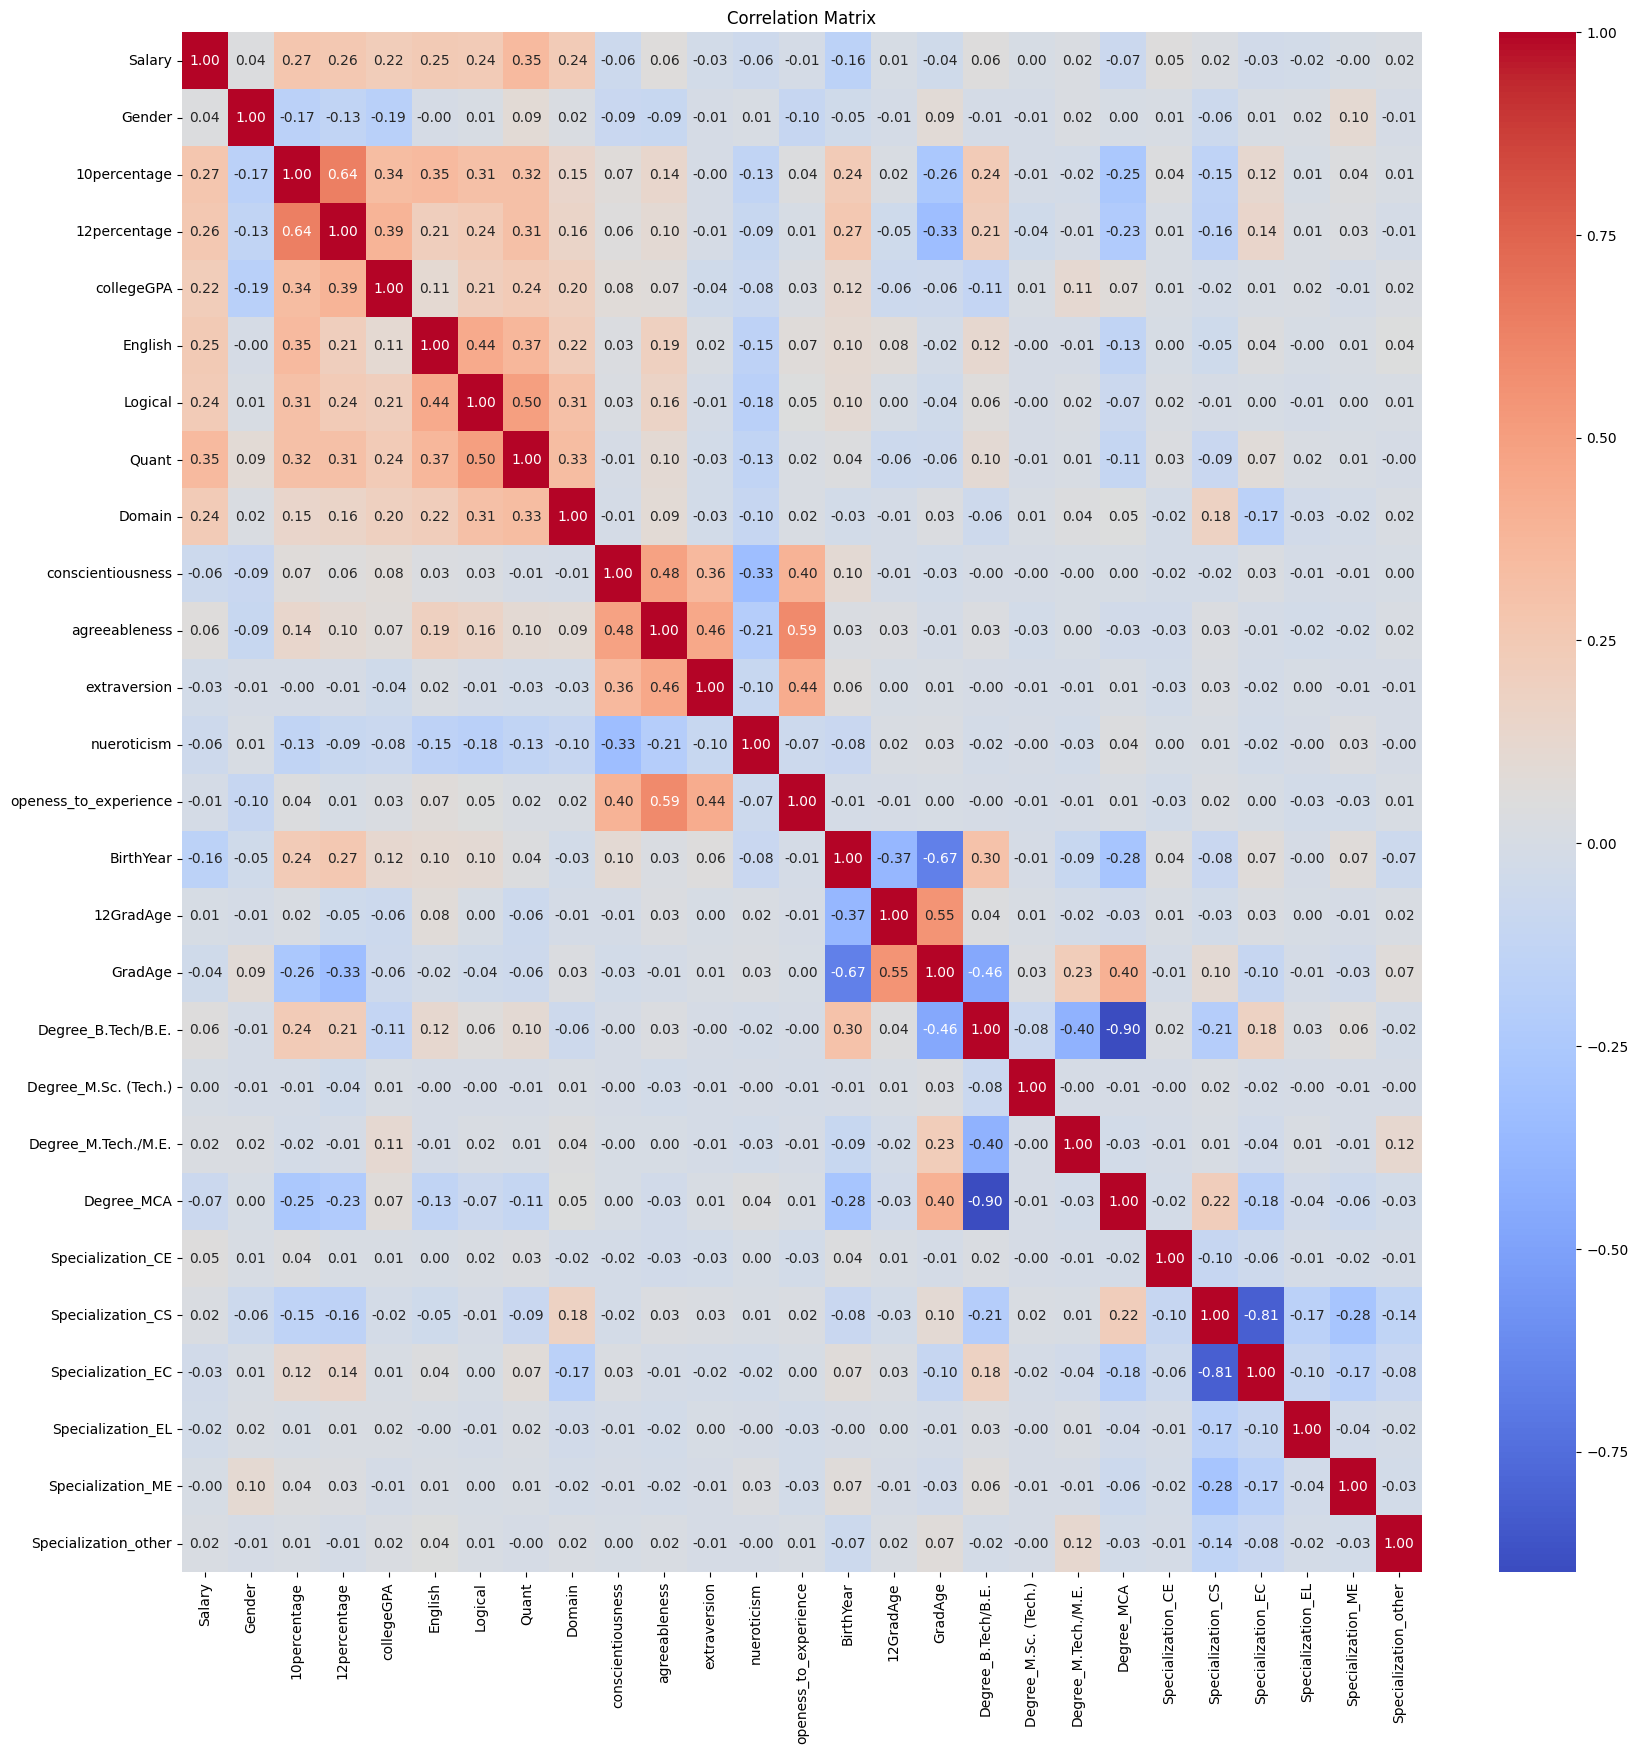

In [158]:
# Correlation Matrix
corr = trainData.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [159]:
X = trainData.drop('Salary', axis=1)
y = trainData['Salary']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X_poly = poly.fit_transform(testData)
testData = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(testData.columns))

print(X.info())
print(testData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Columns: 378 entries, 1 to Specialization_other^2
dtypes: float64(378)
memory usage: 11.4 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 378 entries, 1 to Specialization_other^2
dtypes: float64(378)
memory usage: 4.3 MB
None


In [160]:
k = 30
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['10percentage', '12percentage', 'collegeGPA', 'English', 'Logical',
       'Quant', 'Domain', 'conscientiousness', 'agreeableness', 'nueroticism',
       'BirthYear', 'Degree_B.Tech/B.E.', 'Degree_MCA', '10percentage^2',
       '10percentage Degree_B.Tech/B.E.', '10percentage Degree_MCA',
       'Domain Specialization_CS', 'Domain Specialization_EC',
       'conscientiousness Degree_M.Tech./M.E.', 'agreeableness^2',
       'agreeableness openess_to_experience',
       'extraversion openess_to_experience', 'openess_to_experience^2',
       'GradAge Degree_MCA', 'Degree_B.Tech/B.E.^2',
       'Degree_B.Tech/B.E. Degree_MCA', 'Degree_MCA^2',
       'Degree_MCA Specialization_CS', 'Degree_MCA Specialization_EC',
       'Degree_MCA Specialization_EL'],
      dtype='object')


In [161]:
selected_features = list(selected_features)
X = X[selected_features]
testData=testData[selected_features]
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3962 entries, 0 to 3961
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   10percentage                           3962 non-null   float64
 1   12percentage                           3962 non-null   float64
 2   collegeGPA                             3962 non-null   float64
 3   English                                3962 non-null   float64
 4   Logical                                3962 non-null   float64
 5   Quant                                  3962 non-null   float64
 6   Domain                                 3962 non-null   float64
 7   conscientiousness                      3962 non-null   float64
 8   agreeableness                          3962 non-null   float64
 9   nueroticism                            3962 non-null   float64
 10  BirthYear                              3962 non-null   float64
 11  Degr

### **6. Gradient Descent for Linear Regression**

#### **6.1 Implement Gradient Descent Methods**

Implement three gradient descent methods: Batch Gradient Descent, Stochastic Gradient Descent, and Mini-Batch Gradient Descent.

**6.1.1 Batch Gradient Descent**
```python
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    # complete the code
    return weights, bias
```

In [17]:
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.random.randn(n) * 0.01
    bias = 0
    y = y.flatten()
    for i in range(epochs):
        h = np.dot(X, weights) + bias
        dw = 1/m * np.dot(X.T, (h - y))
        db = 1/m * np.sum(h - y)
        weights -= lr * dw
        bias -= lr * db
    return weights, bias


**6.1.2 Stochastic Gradient Descent**
```python
def stochastic_gradient_descent(X, y, lr=0.01, epochs=1000):
    # complete the code
    return weights, bias
```

In [175]:
def stochastic_gradient_descent(X, y, lr=0.001, epochs=1000): # If I select K=10 then lr=0.01 works otherwise increase of K I have to decrease the lr
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        X = X.values
    m, n = X.shape
    weights = np.random.randn(n) * 0.01
    bias = 0
    y = y.flatten()
    for i in range(epochs):
        for j in range(m):
            h = np.dot(X[j], weights) + bias
            dw = (h - y[j]) * X[j]
            db = (h - y[j])
            weights -= lr * dw
            bias -= lr * db
    return weights, bias


**6.1.3 Mini-Batch Gradient Descent**
```python
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=32):
    # complete the code
    return weights, bias
```

In [126]:
def mini_batch_gradient_descent(X, y, lr=0.01, epochs=1000, batch_size=32):
    if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
        X = X.values
    m, n = X.shape
    weights = np.random.randn(n) * 0.01
    bias = 0
    y = y.flatten()
    for i in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            h = np.dot(X_batch, weights) + bias
            dw = 1 / batch_size * np.dot(X_batch.T, (h - y_batch))
            db = 1 / batch_size * np.sum(h - y_batch)
            weights -= lr * dw
            bias -= lr * db
    return weights, bias


### **7. Train and Evaluate Linear Regression Models**

#### **7.1 Train Models**

Split the data into training and validation sets and train using gradient descent methods.

In [176]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train)
y_val = np.array(y_val)
scaler = MinMaxScaler()

y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = scaler.transform(y_val.reshape(-1, 1))

weights_b, bias_b = batch_gradient_descent(X_train, y_train_scaled)
weights_s, bias_s = stochastic_gradient_descent(X_train, y_train_scaled)
weights_m, bias_m = mini_batch_gradient_descent(X_train, y_train_scaled)

print("Batch Gradient Descent - Weights:", weights_b, "Bias:", bias_b)
print("Stochastic Gradient Descent - Weights:", weights_s, "Bias:", bias_s)
print("Mini-Batch Gradient Descent - Weights:", weights_m, "Bias:", bias_m)


Batch Gradient Descent - Weights: [ 1.81883120e-02  1.39425903e-02  1.61292892e-02  1.48280839e-02
  1.86905215e-03  2.72858775e-02  1.29434429e-02 -8.57501070e-03
  1.08774679e-03 -7.15777310e-05 -3.56362845e-02  5.50143320e-02
 -6.65028841e-02  2.72962386e-03 -3.00420997e-03  1.83361593e-03
  1.51649254e-03 -6.73059903e-03 -5.66416315e-03  2.93778238e-03
 -8.67746025e-03  1.31374366e-03  3.69579740e-03 -1.40332215e-03
  1.67403901e-02 -1.32240900e-02  1.22656229e-02 -1.49647341e-02
  1.80760871e-02  4.93130487e-03] Bias: 0.22720967815217705
Stochastic Gradient Descent - Weights: [ 0.01702999  0.02022583  0.01918278  0.01786696  0.00092945  0.02724949
  0.01011751 -0.00725176 -0.00188229 -0.00224651 -0.04074288  0.06483655
 -0.06564987  0.000369   -0.00308129  0.00102489 -0.0025097  -0.01073209
 -0.00430955 -0.00466709 -0.00420269  0.0014082  -0.00567723 -0.0017957
  0.02070065 -0.01101192  0.01294974  0.00246673  0.05125523  0.0214327 ] Bias: 0.2329697791054781
Mini-Batch Gradient De

#### **7.2 Evaluate Models**

Evaluate the models using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared score on the validation set. Display the results for all three gradient descent methods.

In [177]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(X_val, y_val, weights, bias):
    y_pred = np.dot(X_val, weights) + bias
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    return mse, mae, r2

# Batch Gradient Descent
mse_batch, mae_batch, r2_batch = evaluate_model(X_val, y_val_scaled, weights_b, bias_b)
# Stochastic Gradient Descent
mse_stochastic, mae_stochastic, r2_stochastic = evaluate_model(X_val, y_val_scaled, weights_s, bias_s)
# Mini-Batch Gradient Descent
mse_mini_batch, mae_mini_batch, r2_mini_batch = evaluate_model(X_val, y_val_scaled, weights_m, bias_m)


print("Batch Gradient Descent - MSE:", mse_batch, "MAE:", mae_batch, "R-squared:", r2_batch)
print("Stochastic Gradient Descent - MSE:", mse_stochastic, "MAE:", mae_stochastic, "R-squared:", r2_stochastic)
print("Mini-Batch Gradient Descent - MSE:", mse_mini_batch, "MAE:", mae_mini_batch, "R-squared:", r2_mini_batch)


Batch Gradient Descent - MSE: 0.018155801528606963 MAE: 0.09921386781598267 R-squared: 0.24312401863289723
Stochastic Gradient Descent - MSE: 0.01949977682492161 MAE: 0.10262085617983918 R-squared: 0.18709660393966454
Mini-Batch Gradient Descent - MSE: 0.018302303341258843 MAE: 0.09954484554045652 R-squared: 0.23701667586159414


In [178]:
# First train column salary prediction using minibatch weight and bias. 87% accurate.

r=0
first_row = X.iloc[r].values
first_target = y[r]
predicted_scaled_salary = np.dot(first_row, weights_m) + bias_m
predicted_original_salary = scaler.inverse_transform(predicted_scaled_salary.reshape(-1, 1))
print("Corresponding Target Value:", first_target)
print("Predicted Salary:", predicted_original_salary[0][0])


Corresponding Target Value: 420000
Predicted Salary: 366876.88245027146
